In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 가져오기

In [27]:
df = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# datetime 자료형 변환 및 컬럼 생성

In [28]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# date 컬럼별 개수 시각화

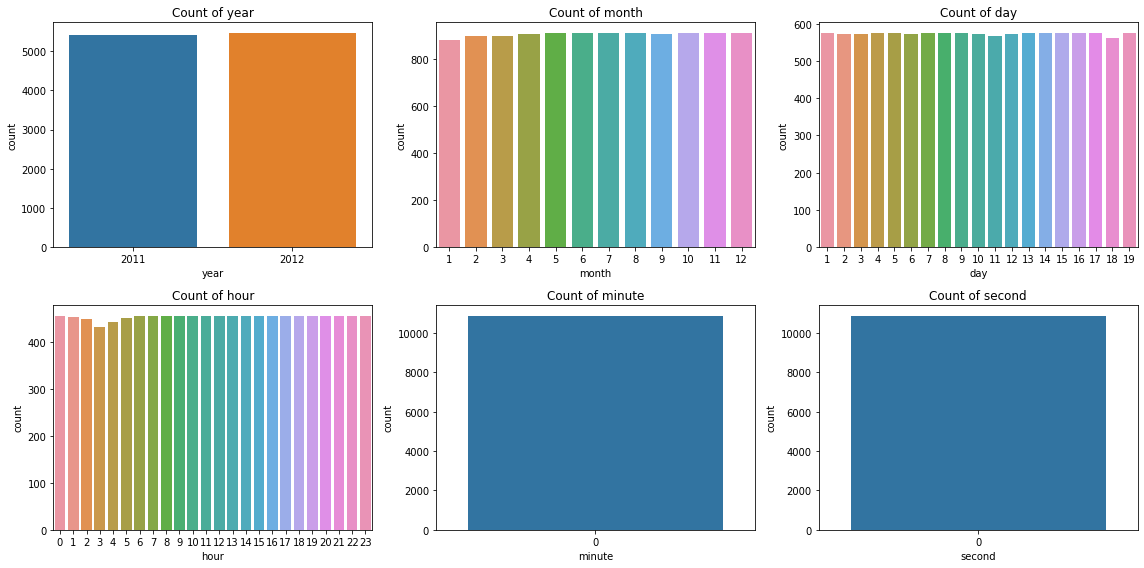

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

date_columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i in range(2):
  for j in range(3):
    date_col_name = date_columns[3*i + j]
    sns.countplot(x=date_col_name, data=df, ax=axes[i, j])
    axes[i, j].set_title(f'Count of {date_col_name}')

plt.tight_layout()
plt.show()

# X, y 컬럼 선택 및 테스트셋 분리

In [30]:
columns = ['season','holiday','workingday','weather',
	'temp','atemp','humidity','windspeed', 'year', 'month', 'day', 'hour']
target = 'count'

df_X = df[columns]
df_y = df[target]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# 모델 학습 및 예측

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
prediction = lr.predict(X_test)
# MSE 손실함수
mse = mean_squared_error(prediction, y_test)
print(f'MSE = {mse}')
# RMSE
rmse = mse ** 0.5
print(f'RMSE = {rmse}')

MSE = 19945.370053754028
RMSE = 141.22807813517122


# 예측 결과 시각화

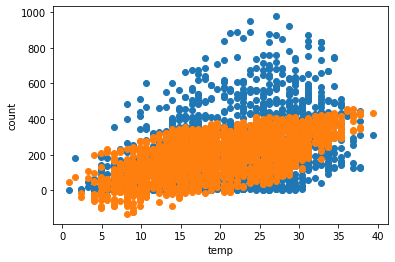

In [32]:
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], prediction)
plt.xlabel('temp')
plt.ylabel('count')
plt.show()